Camera Calibration
===

In [123]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

In [136]:
def calibrateCamera(p_fileNameImages, p_nx, p_ny, p_imgSize):
    
    width = p_imgSize[0]
    height = p_imgSize[1]

    # objpoints will hold the 3D points in real world space.
    # since we know the concrete chessboard image, we also know the coordinates
    # z will be always zero, since the chessboard is on a plane
    # objpoints is the SAME for all images
    objPointsAllImages = []
    
    # imgpoints holds the 2D points in image plane (the distorted image)
    imgPointsAllImages = []
    
    # prepare object points
    objPointsSingleImage = np.zeros((p_nx * p_ny, 3), np.float32)
    objPointsSingleImage[:, :2] = np.mgrid[0:p_nx, 0:p_ny].T.reshape(-1, 2)
    
    for fname in p_fileNameImages:
        img = cv2.imread(fname)
        imgPointsSingleImage = getImagePoints(img, p_nx, p_ny, p_imgSize);
        if len(imgPointsSingleImage) > 0:
            objPointsAllImages.append(objPointsSingleImage)
            imgPointsAllImages.append(imgPointsSingleImage[0])
            
    imgPointsAllImages = np.array(imgPointsAllImages)
    objPointsAllImages = np.array(objPointsAllImages)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPointsAllImages, imgPointsAllImages, (height, width), None, None)
    
    return (mtx, dist)

def getImagePoints(p_image, p_nx, p_ny, p_imgSize):
    
    # imgpoints holds the 2D points in image plane (the distorted image)
    imgpoints = [] 
    
    resizedImage = cv2.resize(p_image, p_imgSize)
    
    # find the chessboard corners
    gray = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (p_nx, p_ny), None)
    
    # if corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        
    return imgpoints

In [137]:
images = glob.glob('./camera_cal/calibration*.jpg')

mtx, dist = calibrateCamera(images, 9, 6, (1280, 720))

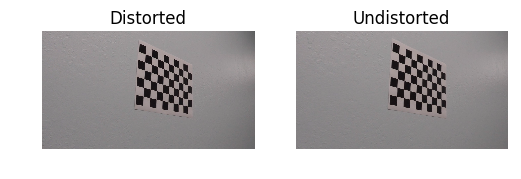

In [151]:
for fname in images:
    distorted = cv2.imread(fname)
    undistorted = cv2.undistort(distorted, mtx, dist, None, mtx )
    cv2.imwrite(fname[:-4] + "-undistorted.jpg", undistorted)

fig = plt.figure()
fig.add_subplot(121), plt.imshow(distorted, cmap='gray'), plt.title('Distorted'), plt.axis('off')
fig.add_subplot(122), plt.imshow(undistorted, cmap='gray'), plt.title('Undistorted'), plt.axis('off')
plt.show()